In [1]:
from sympy import *
FHz, FHy, GHz, GHy, FSz, FSy, GSz, GSy = symbols('FH_z FH_y GH_z GH_y FS_z FS_y GS_z GS_y', real=True)
alpha, theta = symbols('alpha theta', real=True)
n1, n2 = symbols('n_1 n_2', real=True)

## Spherical Aberration
Due to refraction at a flat surface at point $H$, rays from different incoming angles $\theta$ focus at different points, instead of focusing at the original focus point $F$. Assuming homogeneous ray density along $\theta$, the intensity or ray density at screen point $S$ can be computed as $|\frac{\partial \theta}{\partial(FS_y)}|$. Points of singularity are where $|\frac{\partial \theta}{\partial(FS_y)}| = \infty$, or $|\frac{\partial(FS_y)}{\partial \theta}| = 0$.

![Ray of Spherical Aberrations](img/spherical-aberrations.svg)

In [2]:
FHy = FHz * tan(theta)
alpha = asin(n1/n2 * sin(theta))
GHz = FHy / tan(alpha)
GSz = GHz - FSz - FHz
FSy = simplify(GSz*FHy/GHz)

The $y$ position on screen $FS_y$ is:

In [3]:
FSy

(FH_z*n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*tan(theta) - n_1*(FH_z + FS_z)*sin(theta))/(n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1))

The corresponding intensity or ray density $|\frac{\partial \theta}{\partial(FS_y)}|$ is:

In [4]:
dtheta_dFSy = simplify(1 / abs(Derivative(FSy, theta, evaluate=True)))
dtheta_dFSy

(n_1*sin(theta) - n_2)**2*(n_1*sin(theta) + n_2)**2*cos(theta)**2/Abs(-FH_z*n_1**4*sin(theta)**4 + 2*FH_z*n_1**2*n_2**2*sin(theta)**2 + FH_z*n_1*n_2**3*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*cos(theta)**3 - FH_z*n_2**4 + FS_z*n_1*n_2**3*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*cos(theta)**3)

---
Demonstration of not using simplify:

In [5]:
FSy_raw = GSz*FHy/GHz
1 / abs(Derivative(FSy_raw, theta, evaluate=True))

1/Abs(n_1**3*(-FH_z + FH_z*n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*tan(theta)/(n_1*sin(theta)) - FS_z)*sin(theta)**2*cos(theta)/(n_2**3*(-n_1**2*sin(theta)**2/n_2**2 + 1)**(3/2)) + n_1*(-FH_z + FH_z*n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*tan(theta)/(n_1*sin(theta)) - FS_z)*cos(theta)/(n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)) + n_1*(-FH_z*n_1*cos(theta)*tan(theta)/(n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)) + FH_z*n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*(tan(theta)**2 + 1)/(n_1*sin(theta)) - FH_z*n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)*cos(theta)*tan(theta)/(n_1*sin(theta)**2))*sin(theta)/(n_2*sqrt(-n_1**2*sin(theta)**2/n_2**2 + 1)))

---
### First singularity
The first singularity is the focus from the rays incoming at $\theta=0$. A singularity occurs when $|\frac{\partial(FS_y)}{\partial \theta}| = 0$.

In [6]:
dtheta_dFSy_theta0 = dtheta_dFSy.subs(theta, 0)
dtheta_dFSy_theta0

n_2**4/Abs(FH_z*n_1*n_2**3 - FH_z*n_2**4 + FS_z*n_1*n_2**3)

In [7]:
FSz_first_singularity = solve(1/dtheta_dFSy_theta0, FSz)[0]
FSz_first_singularity

FH_z*(-n_1 + n_2)/n_1

The derived expressions are turned into Python functions.

In [8]:
FSy_l = lambdify((theta, n1, n2, FHz, FSz), FSy)
dtheta_dFSy_l = lambdify((theta, n1, n2, FHz, FSz), dtheta_dFSy)
FSz_first_singularity_l = lambdify((n1, n2, FHz), FSz_first_singularity)

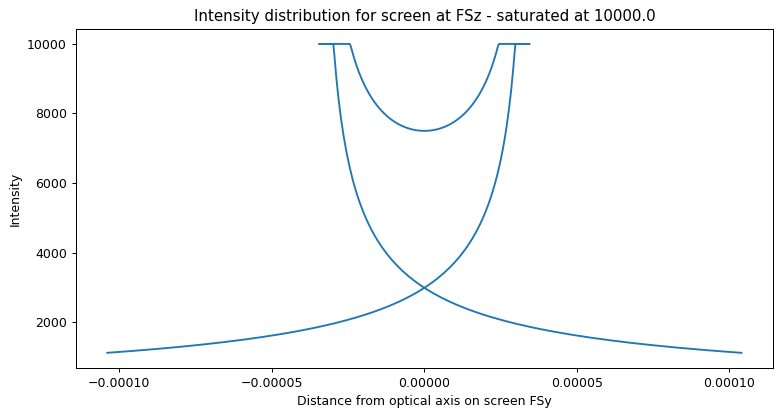

In [12]:
import matplotlib.pyplot as plt
import numpy as np

saturation_value = 1e4
n1_p = 1
n2_p = 1.5
FHz_p = 1e-3
FSz_p = 0.7e-3
theta_p = np.linspace(-0.8, 0.8, 500)

y = FSy_l(theta_p, n1_p, n2_p, FHz_p, FSz_p)
intensity = dtheta_dFSy_l(theta_p, n1_p, n2_p, FHz_p, FSz_p)
intensity_sat = np.fmin(intensity, saturation_value)

fig = plt.figure(figsize=(10,5), dpi=90)
plt.plot(y, intensity_sat)
plt.xlabel('Distance from optical axis on screen FSy')
plt.ylabel('Intensity')
plt.title(f'Intensity distribution for screen at FSz - saturated at {saturation_value}')
plt.show()

Note that intensity values computed like this denote the intensity originating from a specific incoming angle $\theta$, and therefore don't sum the intensities of overlapping caustics.

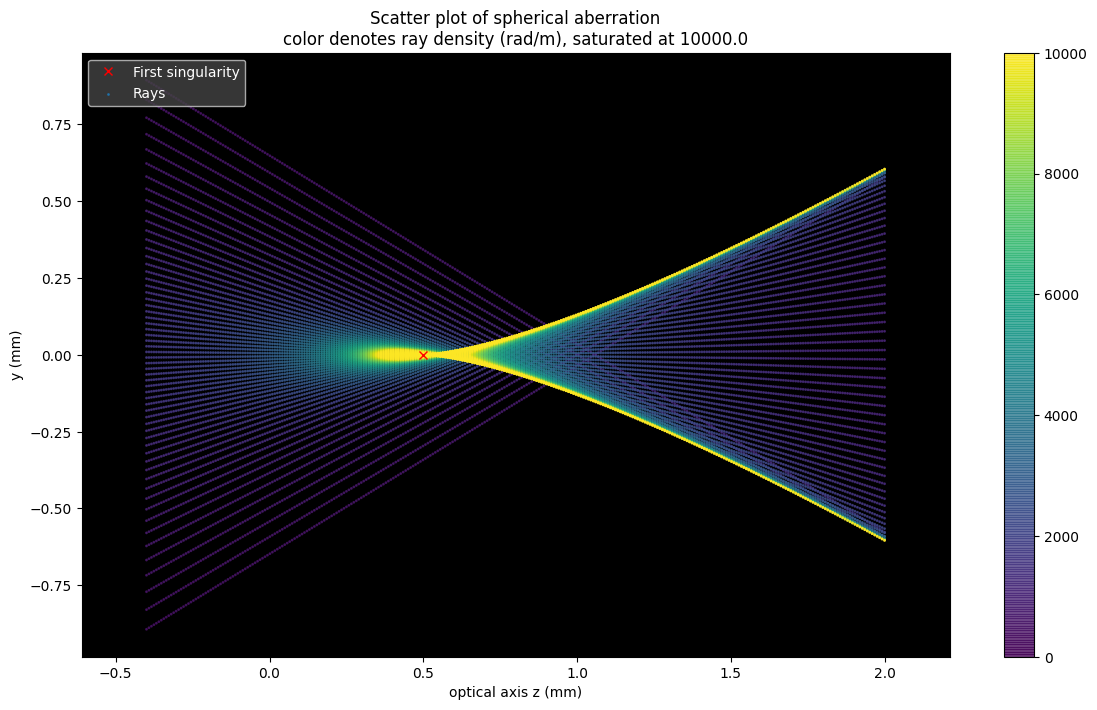

In [23]:
max_theta = 0.9
N_theta = 60
min_FSz = -4e-4
max_FSz = 2e-3
N_FSz = 300

# Define variable ranges
theta_scat = np.linspace(-max_theta, max_theta, N_theta).reshape(N_theta, 1)
FSz_scat = np.linspace(min_FSz, max_FSz, N_FSz)

# Compute y position on screen and intensity
y_scat = FSy_l(theta_scat, n1_p, n2_p, FHz_p, FSz_scat)
intensity_scat = dtheta_dFSy_l(theta_scat, n1_p, n2_p, FHz_p, FSz_scat)
intensity_scat_sat = np.fmin(intensity_scat, saturation_value)

FSz_first_singularity_p = FSz_first_singularity_l(n1_p, n2_p, FHz_p)

# Sort by intensity for nicer scatter plot
i = np.argsort(intensity_scat_sat.reshape(-1,1), axis=0)
intens = intensity_scat_sat.reshape(-1,1)[i]
xpos = (FSz_scat*np.ones(y_scat.shape)).reshape(-1,1)[i]
ypos = y_scat.reshape(-1,1)[i]

# Plot
length_factor = 1e3
length_unit = 'mm'

fig = plt.figure(figsize=(14,8), dpi=100)
plt.plot(FSz_first_singularity_p*length_factor, 0, 'xr', label='First singularity')
scat = plt.scatter(xpos*length_factor, ypos*length_factor, s=1, c=intens, alpha=0.8, label='Rays', vmin=0)
plt.colorbar(scat)
plt.axis('equal')
plt.gca().set_facecolor('black')
legend = plt.legend(loc=2, facecolor='#444444')
for text in legend.get_texts():
    text.set_color("white")
plt.title(f'Scatter plot of spherical aberration\ncolor denotes ray density (rad/m), saturated at {saturation_value}')
plt.xlabel(f'optical axis z ({length_unit})')
plt.ylabel(f'y ({length_unit})')

plt.show()